🎯 Desafio dia 82 — Análise de Uso de Aplicativo de Saúde

📂 Dataset: desafio_dia_82_app_saude.csv

🔍 Contexto: Você foi contratado por uma empresa de tecnologia para analisar o comportamento dos usuários de um aplicativo de saúde e bem-estar. O app permite monitorar treinos, hábitos e progresso semanal dos usuários.

🛠️ Tarefas do desafio

🧹 Tratamento de dados
- Preencha os valores ausentes em tempo_uso_min_semana com a mediana da coluna.

- Preencha os valores ausentes em avaliacao_app com a moda.

📊 Análise geral
- Qual objetivo é o mais comum entre os usuários?

- Qual é o tempo médio de uso semanal por faixa etária?

📈 Visualização de dados
- Crie um gráfico de barras mostrando o tempo médio de uso (tempo_uso_min_semana) por frequência de uso (frequencia_uso).

🤖 Machine Learning - Regressão
- Crie um modelo de regressão para prever a avaliacao_app com base em:

faixa_etaria, objetivo, frequencia_uso, tempo_uso_min_semana

Use:

train_test_split

get_dummies

RandomForestRegressor

Avalie com mean_squared_error.



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("desafio_dia_82_app_saude.csv")
df.head()

,id_usuario,faixa_etaria,objetivo,frequencia_uso,tempo_uso_min_semana,avaliacao_app
0,2132,26-35,Saúde geral,1-2x/semana,110.7,3.0
1,2451,18-25,Manutenção,Diária,137.2,4.0
2,2132,26-35,Perda de peso,Diária,164.6,1.0
3,2412,26-35,Saúde geral,1-2x/semana,145.6,3.0
4,2974,18-25,Saúde geral,1-2x/semana,213.3,5.0


In [4]:
#Preencha os valores ausentes em tempo_uso_min_semana com a mediana da coluna.
df["tempo_uso_min_semana"] = df["tempo_uso_min_semana"].fillna(df["tempo_uso_min_semana"].median())
df["tempo_uso_min_semana"].isna().sum()

0

In [5]:
#Preencha os valores ausentes em avaliacao_app com a moda.
df["avaliacao_app"] = df["avaliacao_app"].fillna(df["avaliacao_app"].mode()[0])
df["avaliacao_app"].isna().sum()

0

In [8]:
#Qual objetivo é o mais comum entre os usuários?
objetivo_comum = df["objetivo"].value_counts()
print(objetivo_comum)

objetivo
Ganho de massa    143
Perda de peso     126
Saúde geral       117
Manutenção        114
Name: count, dtype: int64


In [12]:
#Qual é o tempo médio de uso semanal por faixa etária?
tempo_medio_por_faixa_etaria = df.groupby("faixa_etaria")["tempo_uso_min_semana"].mean().sort_values(ascending=False)
print(tempo_medio_por_faixa_etaria.round(2))

faixa_etaria
26-35    123.81
46-60    122.55
18-25    118.83
36-45    117.88
60+      113.05
Name: tempo_uso_min_semana, dtype: float64


Text(0, 0.5, 'Tempo Médio (min/semana)')

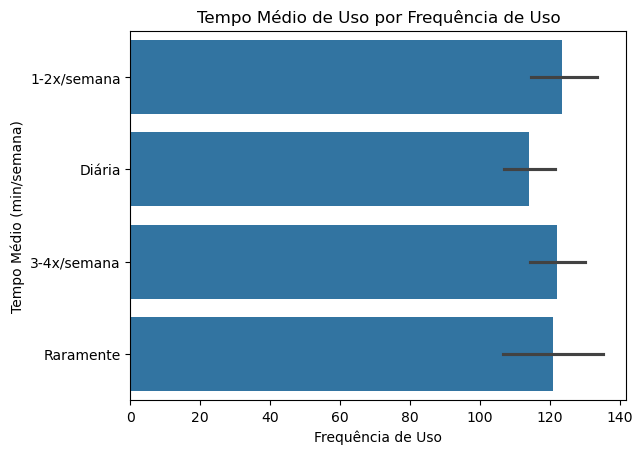

In [14]:
#Crie um gráfico de barras mostrando o tempo médio de uso (tempo_uso_min_semana) por frequência de uso (frequencia_uso).
sns.barplot(df, x="tempo_uso_min_semana", y="frequencia_uso")
plt.title("Tempo Médio de Uso por Frequência de Uso")
plt.xlabel("Frequência de Uso")
plt.ylabel("Tempo Médio (min/semana)")

In [17]:
#Crie um modelo de regressão para prever a avaliacao_app com base em:
X = df[["faixa_etaria", "objetivo", "frequencia_uso", "tempo_uso_min_semana"]]
y = df["avaliacao_app"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.2305313333333334
